In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gait = pd.read_csv("gaitFull.csv")

In [4]:
X = gait.drop('label',  axis=1)
y = gait['label']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [26]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

y_train=list(moving_window(y_train, 1))
y_train=np.asarray(y_train)
print(y_train.shape)

In [27]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
test=y_test
y_test = to_categorical(y_test)

In [28]:
def gen_train(data_array):
    seq_length=10
    num_elements = data_array.shape[0]
    lstm_array=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
            lstm_array.append(data_array[start:stop, :])
    return np.array(lstm_array)
X_train=gen_train(X_train)
X_test=gen_train(X_test)

In [29]:
print(X_train.shape)
print(X_test.shape)

(1890, 10, 11)
(466, 10, 11)


In [31]:
X_train=X_train.reshape((1890,11,10))
X_test=X_test.reshape((466,11,10))

In [32]:
def gen_label(data_array):    
    seq_length=10
    num_elements = data_array.shape[0]
    y_label=[]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        y_label.append(data_array[stop])
    return np.array(y_label)
y_train=gen_label(y_train)
y_test=gen_label(y_test)
test=gen_label(test)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization, LSTM,Conv1D
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

In [34]:
model = Sequential()
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model.add(LSTM(64,activation='relu',input_shape=(n_timesteps, n_features)))
model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 64)                19200     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_10 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_11 (Dense)             (None, 32)               

In [35]:
filepath="HAR_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [36]:
history = model.fit(X_train, y_train , epochs=30 , batch_size = 256 , validation_data=(X_test, y_test) , callbacks=[checkpoint,lr_reduce])

Train on 1890 samples, validate on 466 samples
Epoch 1/30
1890/1890 [==============================] - 1s 463us/step - loss: 2.0841 - accuracy: 0.1317 - val_loss: 2.1296 - val_accuracy: 0.1459
Epoch 2/30
1890/1890 [==============================] - 0s 70us/step - loss: 2.0619 - accuracy: 0.1704 - val_loss: 2.1421 - val_accuracy: 0.1567
Epoch 3/30
 256/1890 [===>..........................] - ETA: 0s - loss: 2.0533 - accuracy: 0.1367

/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1890/1890 [==============================] - 0s 71us/step - loss: 2.0517 - accuracy: 0.1630 - val_loss: 2.1456 - val_accuracy: 0.1524
Epoch 4/30
1890/1890 [==============================] - 0s 70us/step - loss: 2.0438 - accuracy: 0.1720 - val_loss: 2.1443 - val_accuracy: 0.1373
Epoch 5/30
1890/1890 [==============================] - 0s 71us/step - loss: 2.0334 - accuracy: 0.1762 - val_loss: 2.1430 - val_accuracy: 0.1330
Epoch 6/30
1890/1890 [==============================] - 0s 68us/step - loss: 2.0243 - accuracy: 0.1857 - val_loss: 2.1310 - val_accuracy: 0.1202
Epoch 7/30
1890/1890 [==============================] - 0s 68us/step - loss: 2.0171 - accuracy: 0.1926 - val_loss: 2.1459 - val_accuracy: 0.1245
Epoch 8/30
1890/1890 [==============================] - 0s 70us/step - loss: 2.0047 - accuracy: 0.1984 - val_loss: 2.1432 - val_accuracy: 0.1180
Epoch 9/30
1890/1890 [==============================] - 0s 69us/step - loss: 1.9926 - accuracy: 0.2026 - val_loss: 2.1471 - val_accuracy: 0.1

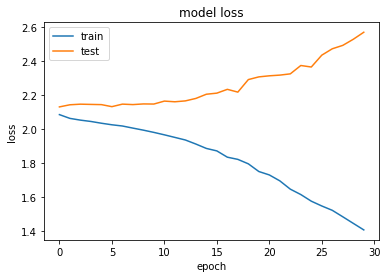

In [37]:
from pylab import rcParams
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [21]:
confusion_matrix(y_true, pred)

array([[40,  3,  2,  0,  0,  0,  0,  0],
       [38,  1,  0,  0,  0,  0,  1,  0],
       [47,  0,  0,  0,  0,  0,  1,  0],
       [43,  1,  1,  0,  0,  0,  3,  0],
       [47,  1,  2,  0,  0,  0,  2,  0],
       [39,  0,  0,  0,  0,  0,  0,  0],
       [56,  1,  1,  0,  0,  0,  2,  0],
       [41,  0,  1,  0,  0,  0,  2,  0]])

In [22]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.11      0.89      0.20        45
           1       0.14      0.03      0.04        40
           2       0.00      0.00      0.00        48
           3       0.00      0.00      0.00        48
           4       0.00      0.00      0.00        52
           5       0.00      0.00      0.00        39
           6       0.18      0.03      0.06        60
           7       0.00      0.00      0.00        44

    accuracy                           0.11       376
   macro avg       0.05      0.12      0.04       376
weighted avg       0.06      0.11      0.04       376



/Users/adithya/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
model = Sequential()
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
model.add(LSTM(
         input_shape=(n_timesteps, n_features),
         units=100,
         return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(
         input_shape=(n_timesteps, n_features),
         units=50,
         return_sequences=False))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='sigmoid'))


model.add(Dense(units=8, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 100)          44800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                3264      
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_20 (Dense)             (None, 196)              

In [51]:
# fit the network
history=model.fit(X_train, y_train, epochs=35, batch_size=200, validation_split=0.05, verbose=1)

Train on 1805 samples, validate on 95 samples
Epoch 1/35
1805/1805 [==============================] - 0s 232us/step - loss: 2.0105 - accuracy: 0.2366 - val_loss: 3.6136 - val_accuracy: 0.0947
Epoch 2/35
1805/1805 [==============================] - 0s 19us/step - loss: 1.9234 - accuracy: 0.2975 - val_loss: 3.6884 - val_accuracy: 0.0947
Epoch 3/35
1805/1805 [==============================] - 0s 15us/step - loss: 1.8578 - accuracy: 0.2510 - val_loss: 3.4021 - val_accuracy: 0.0947
Epoch 4/35
1805/1805 [==============================] - 0s 17us/step - loss: 1.8127 - accuracy: 0.2626 - val_loss: 3.0284 - val_accuracy: 0.0947
Epoch 5/35
1805/1805 [==============================] - 0s 15us/step - loss: 1.7802 - accuracy: 0.2864 - val_loss: 2.6221 - val_accuracy: 0.0947
Epoch 6/35
1805/1805 [==============================] - 0s 14us/step - loss: 1.7730 - accuracy: 0.3030 - val_loss: 2.2872 - val_accuracy: 0.1158
Epoch 7/35
1805/1805 [==============================] - 0s 13us/step - loss: 1.7630

In [52]:
scores = model.evaluate(X_train, y_train, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))

1900/1900 [==============================] - 0s 7us/step
Accurracy: 0.3484210669994354


In [53]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict_classes(X_test)
print('Accuracy of model on test data: ',accuracy_score(test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(test,y_pred))

Accuracy of model on test data:  0.28361344537815125
Confusion Matrix: 
 [[39  2  3  0  0  2  3  4]
 [25 10 12  0  0  1  1  1]
 [15 12 34  0  0  1  4  0]
 [22  1 12  0  1  7  6 10]
 [14  1  5  0  2 43  1  4]
 [17  2  4  0  0 18  8  2]
 [13  0 17  0  0  3 28 10]
 [31  0  9  0  0  4  8  4]]


In [37]:
np.unique(test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([45, 40, 48, 48, 52, 39, 60, 44]))

In [ ]:
X_test.shape